In [57]:
import pandas as pd
import numpy as np

## Read the dataset

In [58]:
_dataset = pd.read_csv('../input/eergy-efficiency-dataset/ENB2012_data.csv')
_dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


### Take out the targets

In [59]:
target = pd.DataFrame(_dataset, columns=['Y1', 'Y2'])
_dataset = _dataset[_dataset.columns.drop(['Y1', 'Y2'])]
_dataset
# Y2 = _dataset.pop('Y2')

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


## Normalize Data

In [60]:
from sklearn.preprocessing import normalize
_dataset = normalize(_dataset)

In [61]:
## Initially Let us try without normalizing the data

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(_dataset, target, test_size = 0.2)

In [63]:
Y1_train = Y_train.pop('Y1').to_numpy()
Y2_train = Y_train.to_numpy()
Y1_test = Y_test.pop('Y1').to_numpy()
Y2_test = Y_test.to_numpy()

In [64]:
Y1_train = np.expand_dims(Y1_train, axis=1)
Y1_train.shape
Y1_test = np.expand_dims(Y1_test, axis=1)
Y1_test.shape

(154, 1)

# Model creation

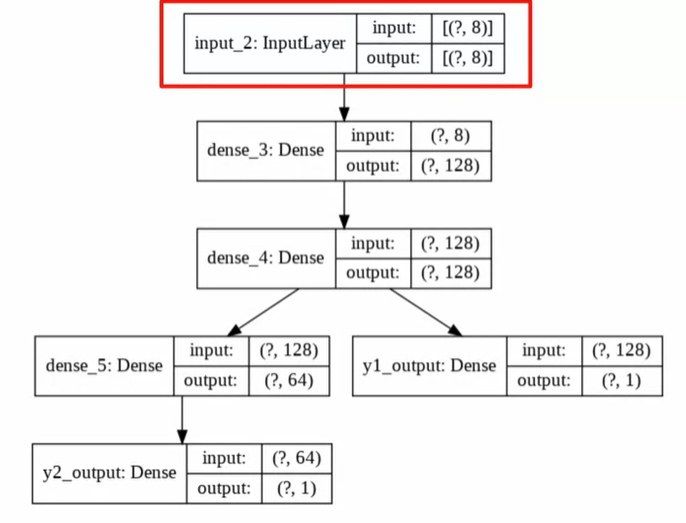

In [75]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
_input = Input(shape=(8))
dense1 = Dense(units = 128, activation = 'relu')(_input)
dense2 = Dense(units = 128, activation = 'relu')(dense1)
y1_output = Dense(units = 1, activation = None, name='y1_output')(dense2)
dense3 = Dense(units = 64, activation = 'relu')(dense2)
y2_output = Dense(units = 1,activation = None, name='y2_output')(dense3)

model = Model(inputs = _input, outputs = [y1_output, y2_output])
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 128)          1152        input_9[0][0]                    
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 128)          16512       dense_27[0][0]                   
__________________________________________________________________________________________________
dense_29 (Dense)                (None, 64)           8256        dense_28[0][0]                   
____________________________________________________________________________________________

In [76]:
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
model.compile(SGD(learning_rate=0.0001),
              loss = {'y1_output': 'mse','y2_output': 'mse'},
              metrics = {'y1_output': tf.keras.metrics.RootMeanSquaredError(), 'y2_output': tf.keras.metrics.RootMeanSquaredError()})

In [77]:
history = model.fit(X_train, [Y1_train, Y2_train], validation_data = (X_test, (Y1_test, Y2_test)), epochs=300)

Epoch 1/300
20/20 [==============================] - 1s 18ms/step - loss: 1262.0874 - y1_output_loss: 578.6566 - y2_output_loss: 683.4308 - y1_output_root_mean_squared_error: 24.0553 - y2_output_root_mean_squared_error: 26.1425 - val_loss: 1340.6266 - val_y1_output_loss: 616.8646 - val_y2_output_loss: 723.7620 - val_y1_output_root_mean_squared_error: 24.8368 - val_y2_output_root_mean_squared_error: 26.9028
Epoch 2/300
20/20 [==============================] - 0s 5ms/step - loss: 1227.6569 - y1_output_loss: 560.4460 - y2_output_loss: 667.2109 - y1_output_root_mean_squared_error: 23.6737 - y2_output_root_mean_squared_error: 25.8304 - val_loss: 1303.3748 - val_y1_output_loss: 597.0378 - val_y2_output_loss: 706.3370 - val_y1_output_root_mean_squared_error: 24.4344 - val_y2_output_root_mean_squared_error: 26.5770
Epoch 3/300
20/20 [==============================] - 0s 6ms/step - loss: 1185.0083 - y1_output_loss: 538.3892 - y2_output_loss: 646.6193 - y1_output_root_mean_squared_error: 23.2032

In [94]:
evalutation_history = model.evaluate(x = X_test, y = [Y1_test, Y2_test])

5/5 [==============================] - 0s 3ms/step - loss: 54.2125 - y1_output_loss: 27.0809 - y2_output_loss: 27.1315 - y1_output_root_mean_squared_error: 5.2039 - y2_output_root_mean_squared_error: 5.2088


Text(0.5, 1.0, 'Y2 training loss')

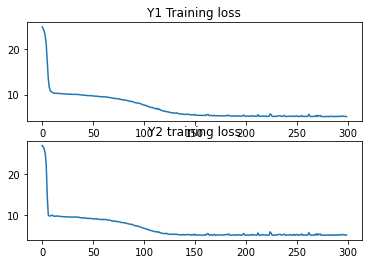

In [93]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2)
ax[0].plot(history.history['val_y1_output_root_mean_squared_error'])
ax[0].set_title('Y1 Training loss')
ax[1].plot(history.history['val_y2_output_root_mean_squared_error'])
ax[1].set_title('Y2 training loss')